In [1]:
import math 
import time
import numpy as np
import torch
from d2l import torch as d2l

In [2]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [3]:
# 定义一个计时器
class Timer:
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        # 在init定义的函数相当于public了
        self.start()
    
    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times)/len(self.times)
    
    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [4]:
c = torch.zeros(n)
# 实列化一个对象
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
# 建议学习
f'{timer.stop():.18f} sec'

'0.061167716979980469 sec'

In [5]:
timer.start()
d = a + b
f'{timer.stop():.18f} sec'

'0.000000000000000000 sec'

In [6]:
def normal(x, mu, sigma):
    p = 1/math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

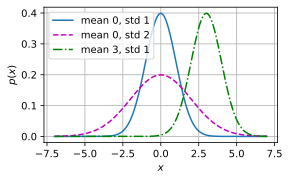

In [7]:
# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='$x$', 
         ylabel='$p(x)$', figsize=(4.2, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

In [8]:
import random
import torch
from d2l import torch as d2l

In [9]:
def synthetic_data(w, b, num_examples):
    """生成 y = Xw + b + 噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [10]:
true_w = torch.tensor([2, -3.4])
ture_b = 4.2
featrues, labels = synthetic_data(true_w, ture_b, 1000)

In [11]:
print('featues:', featrues[0], '\nlabel:', labels[0])

featues: tensor([ 1.7261, -2.0235]) 
label: tensor([14.5400])


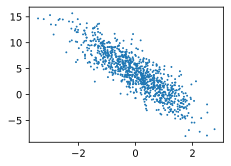

In [12]:
d2l.set_figsize()
d2l.plt.scatter(featrues[:,1].detach().numpy(), labels.detach().numpy(), 1)